In [1]:
# Load HSAUR3 package
library(HSAUR3)

# Verify 
(.packages())

Loading required package: tools


[1] "HSAUR3"    "tools"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"

In [10]:
# Visualize the dataset
data("weightgain", package = "HSAUR3")
weightgain

source,type,weightgain
Beef,Low,90
Beef,Low,76
Beef,Low,90
Beef,Low,64
Beef,Low,86
Beef,Low,51
Beef,Low,72
Beef,Low,90
Beef,Low,95
Beef,Low,78


### Exploratory Visualizations

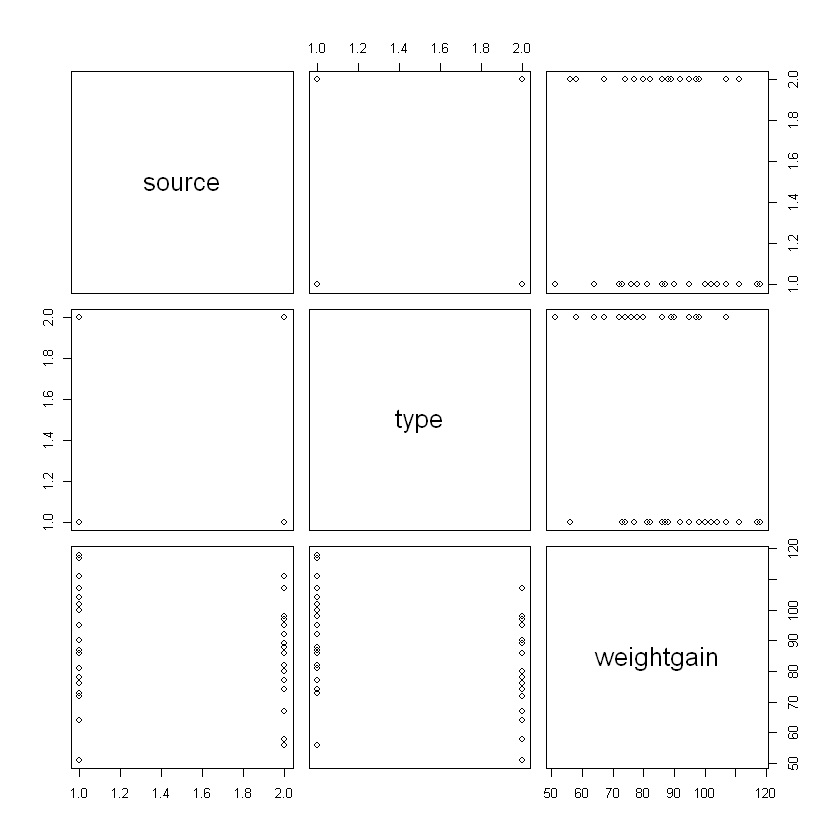

In [44]:
plot(weightgain)

In [7]:
# Calculate mean of each combination
tapply(weightgain$weightgain, list(weightgain$source, weightgain$type), mean)

,High,Low
Beef,100.0,79.2
Cereal,85.9,83.9


In [9]:
# Calculate standard deviation of each combination
tapply(weightgain$weightgain, list(weightgain$source, weightgain$type), sd)

,High,Low
Beef,15.13642,13.88684
Cereal,15.02184,15.70881


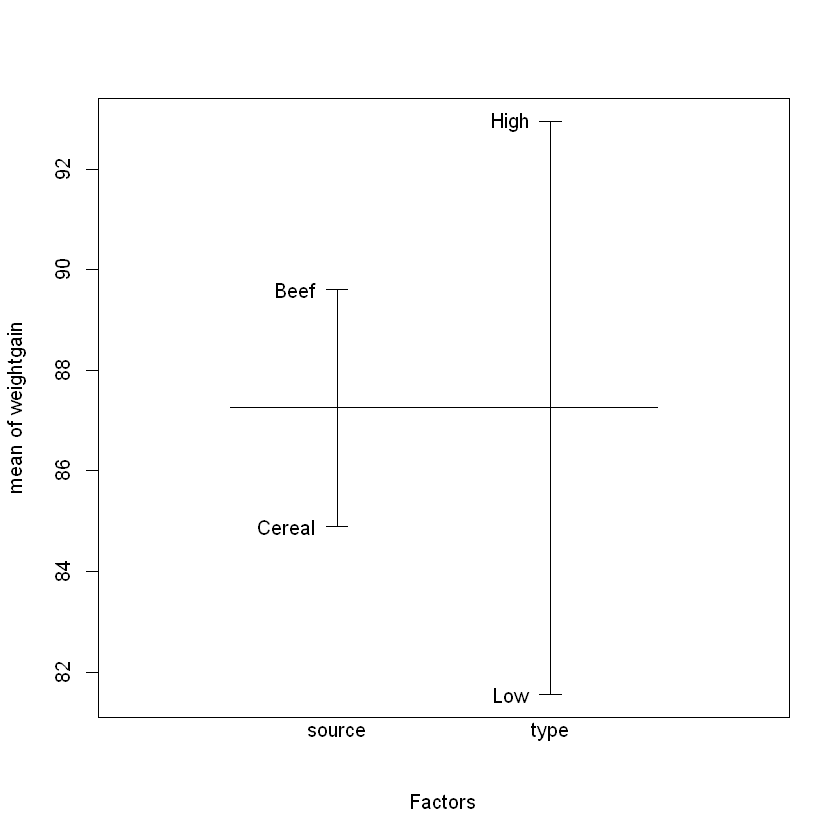

In [11]:
plot.design(weightgain) 

In [36]:
# Verify
# Mean of all weightgain
mean(weightgain$weightgain)
weightgain_subset <- weightgain[ which(weightgain$type=='High'),]
mean(weightgain_subset$weightgain)
weightgain_subset <- weightgain[ which(weightgain$type=='Low'),]
mean(weightgain_subset$weightgain)
weightgain_subset <- weightgain[ which(weightgain$source=='Beef'),]
mean(weightgain_subset$weightgain)
weightgain_subset <- weightgain[ which(weightgain$source=='Cereal'),]
mean(weightgain_subset$weightgain)

[1] 87.25

[1] 92.95

[1] 81.55

[1] 89.6

[1] 84.9

### Analysis of variance

In [38]:
wg.aov <- aov(weightgain ~ source*type, data=weightgain) 
summary(wg.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
source       1    221   220.9   0.988 0.3269  
type         1   1300  1299.6   5.812 0.0211 *
source:type  1    884   883.6   3.952 0.0545 .
Residuals   36   8049   223.6                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

p value for **type** is lower than 0.05, which suggests strong difference between **"type = High"** and **"type = Low"** on **"weightgain"**. 

In [46]:
# Interpret coefficients
coef(wg.aov)

(Intercept)         sourceCereal              typeLow 
               100.0                -14.1                -20.8 
sourceCereal:typeLow 
                18.8

#### What this really means?

* intercept is the 'initial estimation' or 'global mean'
* sourceCereal are 14.1 **lower than** not sourceCereal 
* typeLow would be 20.8 **lower than** not typeLow 

We can express the model as a sum of indicators: weightgain = 100 - 14.1 **x** indicator(source == Cereal) - 20.8 **x** indicator(type == Low) + 18.8 **x** indicator(source == Cereal & type == Low)

In [40]:
options("contrasts")

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly"

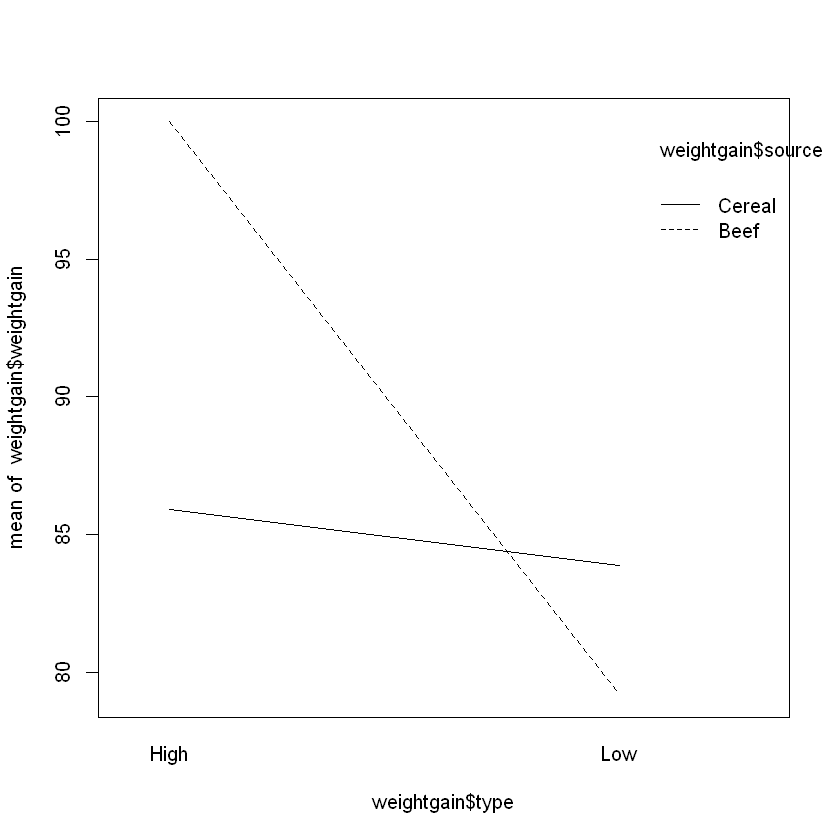

In [41]:
interaction.plot(weightgain$type, weightgain$source, weightgain$weightgain)

### Access validility of model assumptions

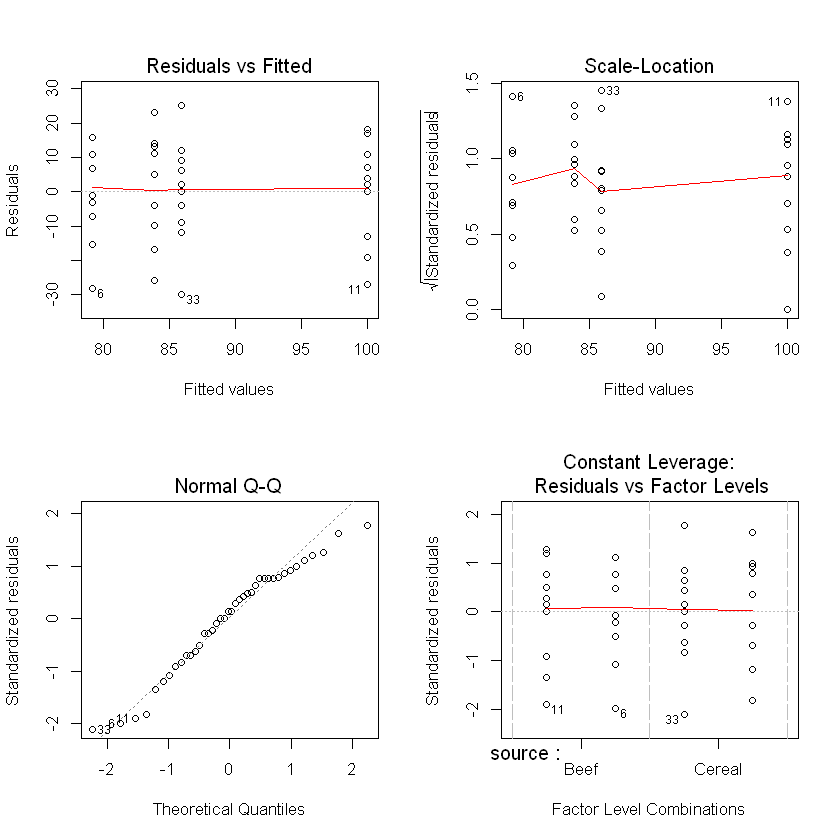

In [42]:
layout(matrix(1:4,ncol=2)) 
plot(wg.aov)